# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Outlier-removal:" data-toc-modified-id="Outlier-removal:-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier removal:</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [3]:
import pandas as pd
import numpy as np
import urllib
import requests
import os
import io
import json
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib

In [5]:
if os.getenv("PUIDATA") is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
else:
    pass
print(os.getenv("PUIDATA"))

/nfshome/sg5718/PUIdata


In [4]:
!curl https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW9_fb55/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv > firearms.csv
!mv  firearms.csv $PUIDATA   
url = urllib.urlretrieve('data:application/octet-stream;charset=utf-8,Country%2CGuns%20per%20100%20inhabitants%2CNumber%20of%20mass%20shootings%20(1983-2013)%0AAustralia%2C15%2C4%0AAustria%2C30.4%2C1%0ABelgium%2C17.2%2C2%0ACanada%2C30.8%2C4%0ADenmark%2C12%2C0%0AFinland%2C45.3%2C2%0AFrance%2C31.2%2C6%0AGermany%2C30.3%2C7%0AGreece%2C22.5%2C0%0AHolland%2C3.9%2C2%0AHungary%2C5.5%2C0%0AIceland%2C30.3%2C0%0AIreland%2C8.6%2C0%0AItaly%2C11.9%2C0%0AJapan%2C0.6%2C0%0ALuxembourg%2C15.3%2C0%0ANew%20Zealand%2C22.6%2C3%0ANorway%2C31.3%2C1%0APoland%2C1.3%2C0%0APortugal%2C8.5%2C1%0ASpain%2C10.4%2C1%0ASweden%2C31.6%2C2%0ASwitzerland%2C45.7%2C2%0AUnited%20Kingdom%2C6.2%2C3%0AUnited%20States%2C88.8%2C78',
                          'MassShootings.csv')
!mv  MassShootings.csv $PUIDATA

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7852  100  7852    0     0  72926      0 --:--:-- --:--:-- --:--:-- 73383


In [5]:
url = urllib.urlretrieve('http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv', 
                              'Population.zip')
!unzip Population.zip -d $PUIDATA/Population
!rm -f Population.zip
url = urllib.urlretrieve('http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv', 
                              'GDP.zip')
!unzip GDP.zip -d $PUIDATA/GDP
!rm -f GDP.zip

Archive:  Population.zip
  inflating: /nfshome/sg5718/PUIdata/Population/Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv  
  inflating: /nfshome/sg5718/PUIdata/Population/API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv  
  inflating: /nfshome/sg5718/PUIdata/Population/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv  
Archive:  GDP.zip
  inflating: /nfshome/sg5718/PUIdata/GDP/Metadata_Indicator_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv  
  inflating: /nfshome/sg5718/PUIdata/GDP/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv  
  inflating: /nfshome/sg5718/PUIdata/GDP/Metadata_Country_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv  


In [6]:
massshooting = pd.read_csv(os.getenv("PUIDATA") + "/MassShootings.csv")
massshooting.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [7]:
massshooting.rename(columns={'Number of mass shootings (1983-2013)': 'Number of mass shootings', 
                             'Guns per 100 inhabitants': 'Guns/100 inhabitants'}, inplace=True)

In [8]:
population = pd.read_csv(os.getenv("PUIDATA") + "/Population/API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv", skiprows=1, header=1)
population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN


In [9]:
population = population[['Country Name', '2012']]
population.rename(columns={'2012': 'pop'}, inplace=True)
population.dropna(inplace=True)
population.head()

,Country Name,pop
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [10]:
gdp = pd.read_csv(os.getenv("PUIDATA") + "/GDP/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv", skiprows=1, header=1)
gdp = gdp[['Country Name', '2012']]
gdp.rename(columns={'2012': 'gdp'}, inplace=True)
gdp.dropna(inplace=True)
gdp.head()

,Country Name,gdp
1,Afghanistan,2.053654e+10
2,Angola,1.139232e+11
3,Albania,1.231978e+10
4,Andorra,3.164615e+09
5,Arab World,2.786139e+12


In [11]:
firearms = pd.read_csv(os.getenv("PUIDATA") + "/firearms.csv")
firearms.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [12]:
firearms = firearms[['Country/Territory', 'Average total all civilian firearms', 'Number of homicides by firearm']]
firearms.rename(columns={"Country/Territory": "Country Name"}, inplace=True)
firearms.dropna(inplace=True)
firearms.head()

,Country Name,Average total all civilian firearms,Number of homicides by firearm
0,Albania,270000.0,56.0
1,Algeria,1900000.0,20.0
4,Argentina,3950000.0,1198.0
5,Armenia,380000.0,9.0
6,Australia,3050000.0,30.0


In [13]:
df_ = firearms.merge(population).merge(gdp).merge(massshooting,right_on="Country", left_on="Country Name")
df_.head()

,Country Name,Average total all civilian firearms,Number of homicides by firearm,pop,gdp,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,3050000.0,30.0,22742475.0,1.543411e+12,Australia,15.0,4
1,Austria,2500000.0,18.0,8429991.0,4.094252e+11,Austria,30.4,1
2,Belgium,1800000.0,70.0,11128246.0,4.978842e+11,Belgium,17.2,2
3,Canada,9950000.0,173.0,34750545.0,1.824289e+12,Canada,30.8,4
4,Denmark,650000.0,15.0,5591572.0,3.271489e+11,Denmark,12.0,0


# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


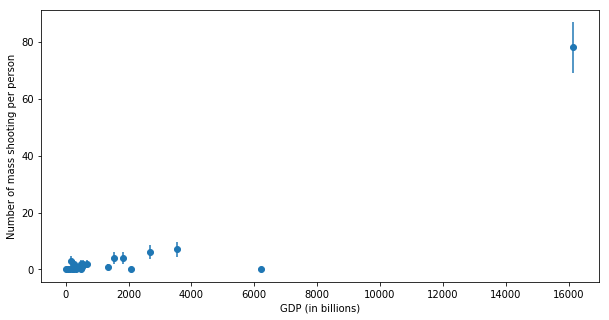

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of mass shootings.


In [14]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['Number of mass shootings'])
ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of mass shootings.")


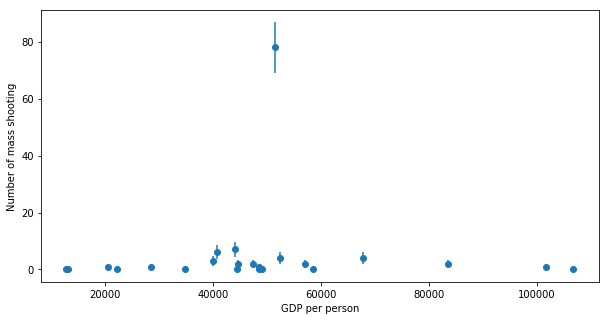

Number of mass shooting vs GDP per person, errors represent Poisson statistics.
The datapoint to the top center of the plot is the USA, which has the highest number of mass shootings. 


In [15]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

df_['gdp1'] = df_["gdp"] / df_['pop']

scatter = ax.scatter(df_.gdp1, df_['Number of mass shootings'])
ax.errorbar(df_.gdp1, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP per person")
ax.set_ylabel("Number of mass shooting")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP per person, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top center of the plot is the USA, " + 
       "which has the highest number of mass shootings. ")

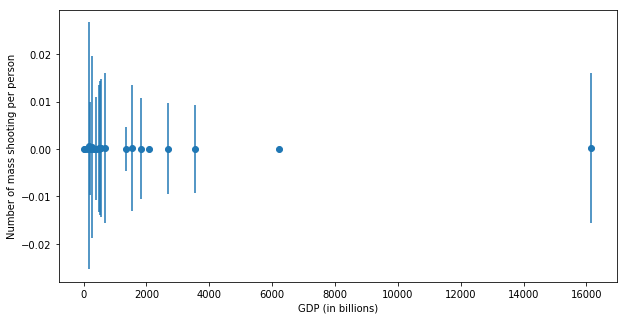

Number of mass shooting per person vs GDP, errors represent Poisson statistics.
The datapoint to the righest of the plot is the USA, which has the highest GDP. The datapoint on the center of the 
plot is Japan, which also has high GDP. 


In [16]:
df_['shootingspp'] = df_["Number of mass shootings"] / df_['pop'] * 1e3 ## per person

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['shootingspp'])
ax.errorbar(df_.gdp / 1e9, df_['shootingspp'], 
            yerr = np.sqrt(df_['shootingspp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.show()
print ("Number of mass shooting per person vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the righest of the plot is the USA, " + 
       "which has the highest GDP. " + 
       "The datapoint on the center of the \nplot is Japan, " + 
       "which also has high GDP. ")

## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

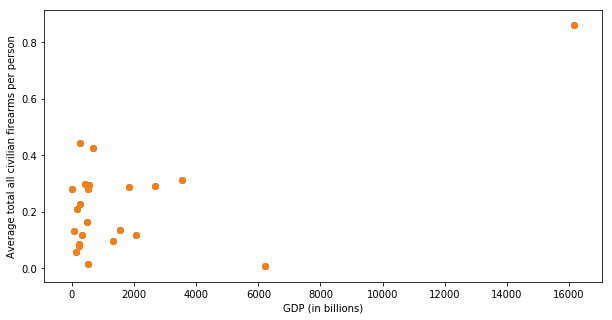

Average total all civilian firearms per person vs GDP, without errors.
The datapoint to the top right of the plot is the USA, which has the highest GDP and the highest average total all 
civilian firearms per person. The datapoint on the bottom center of the plot is Japan, which has high GDP but the 
lowest average total all civilian firearms per person. 


In [17]:
#first without errors
df_['firearmspp'] = df_["Average total all civilian firearms"] / df_['pop']

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['firearmspp'])
ax.scatter(df_.gdp / 1e9, df_['firearmspp'])
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Average total all civilian firearms per person")
ax.set_ylim()
pl.show()
print ("Average total all civilian firearms per person vs GDP, without errors.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has the highest GDP and the highest average total all \ncivilian firearms per person. " + 
       "The datapoint on the bottom center of the plot is Japan, which has high GDP but the \nlowest average total all civilian firearms per person. ")

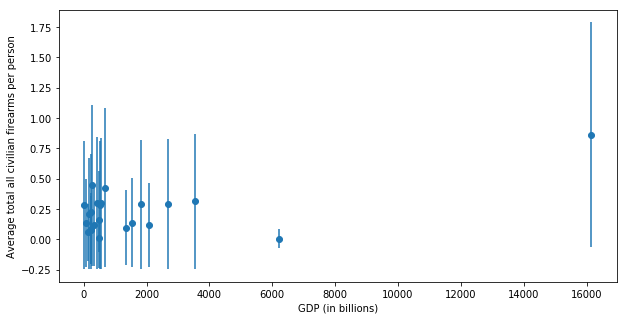

Average total all civilian firearms per person vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has the highest GDP and the highest average total all 
civilian firearms per person. The datapoint on the bottom center of the plot is Japan, which has high GDP but the 
lowest average total all civilian firearms per person. 


In [18]:
# with errors
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['firearmspp'])
ax.errorbar(df_.gdp / 1e9, df_['firearmspp'], 
            yerr = np.sqrt(df_['firearmspp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Average total all civilian firearms per person")
ax.set_ylim()
pl.show()
print ("Average total all civilian firearms per person vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has the highest GDP and the highest average total all \ncivilian firearms per person. " + 
       "The datapoint on the bottom center of the plot is Japan, which has high GDP but the \nlowest average total all civilian firearms per person. ")
       

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

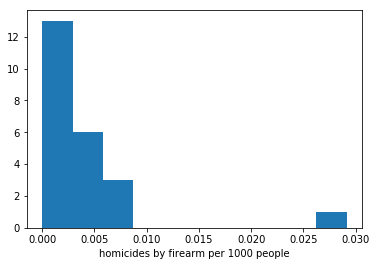

In [19]:
fig, ax = plt.subplots()
ax.hist(df_['Number of homicides by firearm'] / df_['pop'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people');

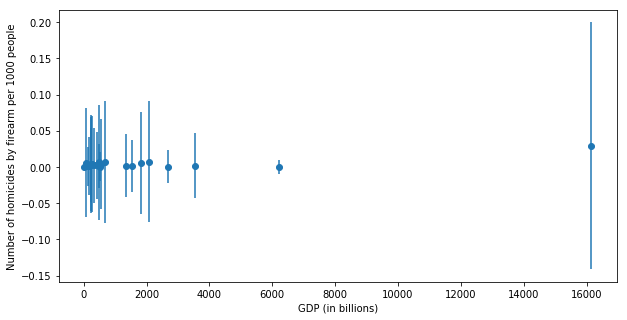

Number of homicides by firearm per 1000 people vs GDP, errors represent Poisson statistics.
The datapoint to the rightest of the plot is the USA, which has the highest GDP. The datapoint on the center of the 
plot is Japan, which also has high GDP. 


In [20]:
##NOTE: per 1000 prople or per person?

df_['homicidepp'] = df_['Number of homicides by firearm'] / df_['pop'] * 1000

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['homicidepp'])
ax.errorbar(df_.gdp / 1e9, df_['homicidepp'], 
            yerr = np.sqrt(df_['homicidepp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of homicides by firearm per 1000 people")
ax.set_ylim()
pl.show()
print ("Number of homicides by firearm per 1000 people vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the rightest of the plot is the USA, " + 
       "which has the highest GDP. " + 
       "The datapoint on the center of the \nplot is Japan, " + 
       "which also has high GDP. ")

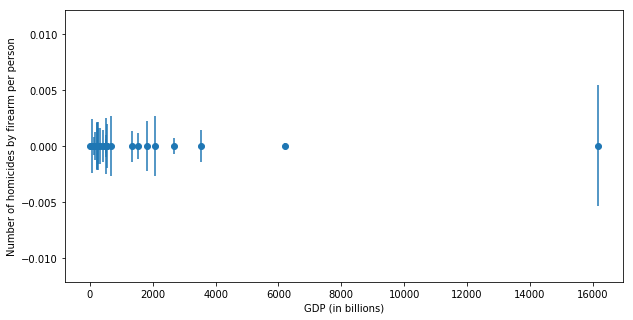

Number of homicides by firearm per person vs GDP, errors represent Poisson statistics.
The datapoint to the rightest of the plot is the USA, which has the highest GDP. The datapoint on the center of the 
plot is Japan, which also has high GDP. 


In [21]:
df_['homicidepp'] = df_['Number of homicides by firearm'] / df_['pop']

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['homicidepp'])
ax.errorbar(df_.gdp / 1e9, df_['homicidepp'], 
            yerr = np.sqrt(df_['homicidepp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of homicides by firearm per person")
ax.set_ylim()
pl.show()
print ("Number of homicides by firearm per person vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the rightest of the plot is the USA, " + 
       "which has the highest GDP. " + 
       "The datapoint on the center of the \nplot is Japan, " + 
       "which also has high GDP. ")

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


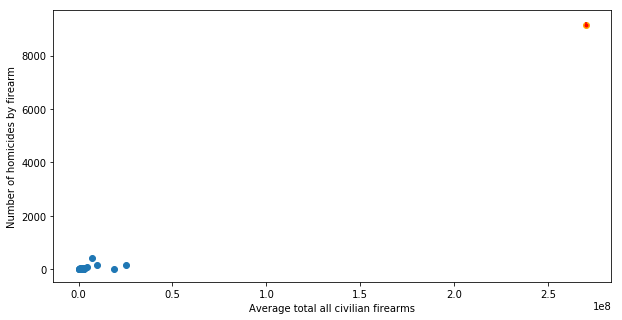

Number of homicides by firearm vs Number of civilian firearms, errors represent Poisson statistics.
The errors are too small to be shown.
The datapoint to the upper right of the plot is the USA, which has the highest number of homicides by firearm and the number of civilian firearms. 


In [22]:
## got helped from Junru Lu (lj1230)
## Trying to separate the US from other countries and plot this two sections together 
## so that we have different color on the US.

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

##other countries
scatter = ax.scatter(df_[df_['Country Name'] != "United States"]["Average total all civilian firearms"], 
           df_[df_['Country Name'] != "United States"]['Number of homicides by firearm'])
ax.errorbar(df_[df_['Country Name'] != "United States"]["Average total all civilian firearms"], 
            df_[df_['Country Name'] != "United States"]['Number of homicides by firearm'], 
            yerr = np.sqrt(df_[df_['Country Name'] != "United States"]['Number of homicides by firearm'] * 1.0), 
            fmt = '.')
##the US
scatter1 = ax.scatter(df_[df_['Country Name'] == "United States"]["Average total all civilian firearms"], 
           df_[df_['Country Name'] == "United States"]['Number of homicides by firearm'], c="orange")
ax.errorbar(df_[df_['Country Name'] == "United States"]["Average total all civilian firearms"], 
            df_[df_['Country Name'] == "United States"]['Number of homicides by firearm'], 
            yerr = np.sqrt(df_[df_['Country Name'] == "United States"]['Number of homicides by firearm'] * 1.0), 
            fmt = '.', color = 'red')

ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of homicides by firearm")
ax.set_ylim()
pl.show()
print ("Number of homicides by firearm vs Number of civilian firearms, " + 
       "errors represent Poisson statistics.\n" + 
       "The errors are too small to be shown.\n" +
       "The datapoint to the upper right of the plot is the USA, " + 
       "which has the highest number of homicides by firearm and the number of civilian firearms. ")

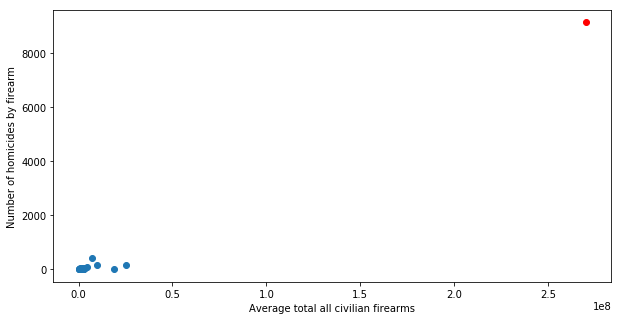

Number of homicides by firearm vs Number of civilian firearms, without errors.
The datapoint to the upper right of the plot is the USA, which has the highest number of homicides by firearm and the number of civilian firearms.


In [23]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

##other countries
scatter = ax.scatter(df_[df_['Country Name'] != "United States"]["Average total all civilian firearms"], 
           df_[df_['Country Name'] != "United States"]['Number of homicides by firearm'])
##the US
scatter1 = ax.scatter(df_[df_['Country Name'] == "United States"]["Average total all civilian firearms"], 
           df_[df_['Country Name'] == "United States"]['Number of homicides by firearm'], color = 'red')
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of homicides by firearm")
ax.set_ylim()
pl.show()
print ("Number of homicides by firearm vs Number of civilian firearms, without errors.\n" + 
       "The datapoint to the upper right of the plot is the USA, " + 
       "which has the highest number of homicides by firearm and the number of civilian firearms.")

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


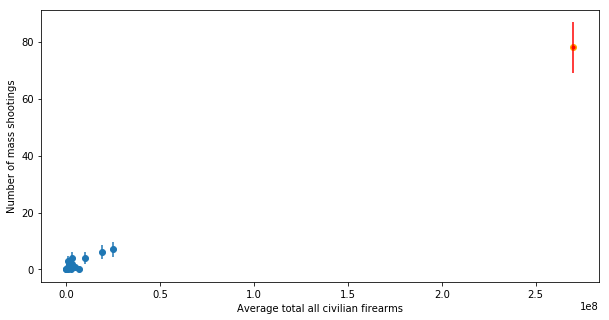

Number of mass shootings vs the number of civilian firearms, errors represent Poisson statistics.
The datapoint to the upper right of the plot is the USA, which has the highest number of mass shootings and the 
number of civilian firearms.


In [24]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

##other countries 
scatter = ax.scatter(df_[df_['Country Name'] != "United States"]["Average total all civilian firearms"], 
           df_[df_['Country Name'] != "United States"]['Number of mass shootings'])
ax.errorbar(df_[df_['Country Name'] != "United States"]["Average total all civilian firearms"], 
            df_[df_['Country Name'] != "United States"]['Number of mass shootings'], 
            yerr = np.sqrt(df_[df_['Country Name'] != "United States"]['Number of mass shootings'] * 1.0), 
            fmt = '.')

##the US
scatter1 = ax.scatter(df_[df_['Country Name'] == "United States"]["Average total all civilian firearms"], 
           df_[df_['Country Name'] == "United States"]['Number of mass shootings'], c="orange")
ax.errorbar(df_[df_['Country Name'] == "United States"]["Average total all civilian firearms"], 
            df_[df_['Country Name'] == "United States"]['Number of mass shootings'], 
            yerr = np.sqrt(df_[df_['Country Name'] == "United States"]['Number of mass shootings'] * 1.0), 
            fmt = '.', color = 'red')
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
pl.show()
print ("Number of mass shootings vs the number of civilian firearms, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the upper right of the plot is the USA, " + 
       "which has the highest number of mass shootings and the \nnumber of civilian firearms.")

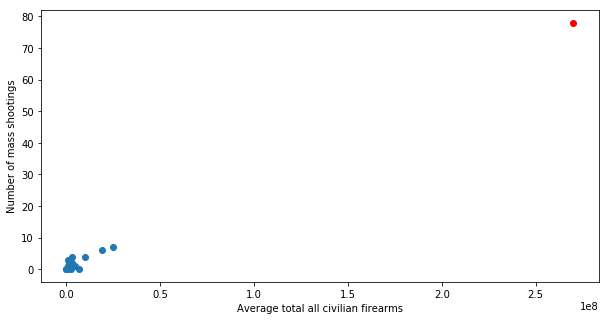

Number of mass shootings vs the number of civilian firearms, without errors.
The datapoint to the upper right of the plot is the USA, which has the highest number of mass shootings and the 
number of civilian firearms.


In [25]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

##other countries 
scatter = ax.scatter(df_[df_['Country Name'] != "United States"]["Average total all civilian firearms"], 
           df_[df_['Country Name'] != "United States"]['Number of mass shootings'])
##the US
scatter1 = ax.scatter(df_[df_['Country Name'] == "United States"]["Average total all civilian firearms"], 
           df_[df_['Country Name'] == "United States"]['Number of mass shootings'],color = 'red')
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
pl.show()
print ("Number of mass shootings vs the number of civilian firearms, without errors.\n" + 
       "The datapoint to the upper right of the plot is the USA, " + 
       "which has the highest number of mass shootings and the \nnumber of civilian firearms.")

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [95]:
df_.head()

,Country Name,Average total all civilian firearms,Number of homicides by firearm,pop,gdp,Country,Guns/100 inhabitants,Number of mass shootings,gdp1,shootingspp,firearmspp,homicidepp
0,Australia,3050000.0,30.0,22742475.0,1.543411e+12,Australia,15.0,4,67864.689862,1.758824,0.134110,0.000001
1,Austria,2500000.0,18.0,8429991.0,4.094252e+11,Austria,30.4,1,48567.695286,1.186241,0.296560,0.000002
2,Belgium,1800000.0,70.0,11128246.0,4.978842e+11,Belgium,17.2,2,44740.583248,1.797228,0.161751,0.000006
3,Canada,9950000.0,173.0,34750545.0,1.824289e+12,Canada,30.8,4,52496.694870,1.151061,0.286326,0.000005
4,Denmark,650000.0,15.0,5591572.0,3.271489e+11,Denmark,12.0,0,58507.500210,0.000000,0.116246,0.000003


In [70]:
df_['shootingspp'] = df_["Number of mass shootings"] / df_['pop'] * 1e7
df_.head()

,Country Name,Average total all civilian firearms,Number of homicides by firearm,pop,gdp,Country,Guns/100 inhabitants,Number of mass shootings,gdp1,shootingspp,firearmspp,homicidepp
0,Australia,3050000.0,30.0,22742475.0,1.543411e+12,Australia,15.0,4,67864.689862,1.758824,0.134110,0.000001
1,Austria,2500000.0,18.0,8429991.0,4.094252e+11,Austria,30.4,1,48567.695286,1.186241,0.296560,0.000002
2,Belgium,1800000.0,70.0,11128246.0,4.978842e+11,Belgium,17.2,2,44740.583248,1.797228,0.161751,0.000006
3,Canada,9950000.0,173.0,34750545.0,1.824289e+12,Canada,30.8,4,52496.694870,1.151061,0.286326,0.000005
4,Denmark,650000.0,15.0,5591572.0,3.271489e+11,Denmark,12.0,0,58507.500210,0.000000,0.116246,0.000003


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


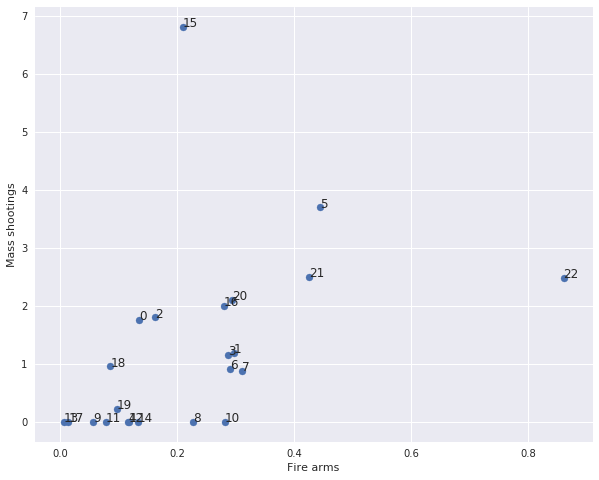

Number of mass shootings per person vs average total all civilian firearms per person.


In [106]:
fig = pl.figure(figsize=(10,8)) 
ax = fig.add_subplot(111)

ax.scatter(df_['firearmspp'], df_['shootingspp'])
for i, txt in enumerate(df_.index):
    ax.annotate(txt, (df_.firearmspp[i], df_.shootingspp[i]))
ax.set_xlabel("Fire arms")
ax.set_ylabel("Mass shootings")
ax.set_ylim()
pl.show()
print("Number of mass shootings per person vs average total all civilian firearms per person.")

In [29]:
import statsmodels.api as sm
smO= sm.OLS(df_['shootingspp'], sm.add_constant(df_['firearmspp'])).fit()
smO.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     4.981
Date:                Wed, 14 Nov 2018   Prob (F-statistic):             0.0367
Time:                        21:12:39   Log-Likelihood:                -40.676
No. Observations:                  23   AIC:                             85.35
Df Residuals:                      21   BIC:                             87.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.3684      0.497      0.742      0.467        -0.665     1.402
firearmspp     3.8373      1.719      2.232      0.037         0.262     7.413
==============================================================================
Omnibus:                       34.558   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.760
Skew:                           2.666   Prob(JB):                     5.32e-20
Kurtosis:                      11.012   Cond. No.                         5.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

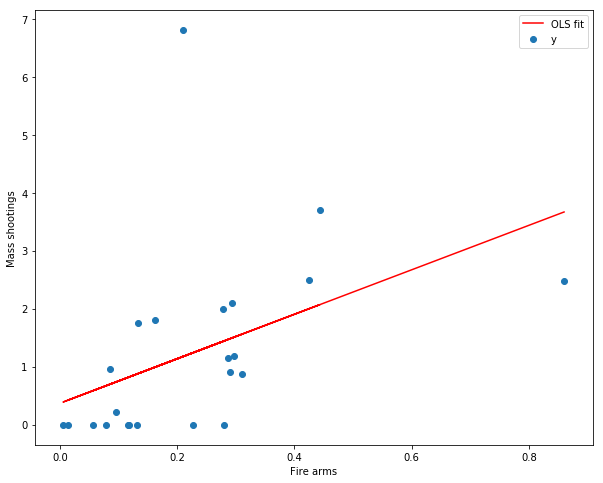

Number of mass shootings per person vs average total all civilian firearms per person and statsmodel OLS.


In [30]:
fig = pl.figure(figsize=(10,8)) 
ax = fig.add_subplot(111)

ax.scatter(df_['firearmspp'], df_['shootingspp'], label="y")
ax.plot(df_['firearmspp'], smO.predict(sm.add_constant(df_['firearmspp'])), label="OLS fit", color="red")
ax.set_xlabel("Fire arms")
ax.set_ylabel("Mass shootings")
ax.legend()
ax.set_ylim()
pl.show()
print("Number of mass shootings per person vs average total all civilian firearms per person and statsmodel OLS.")

In [31]:
smW= sm.WLS(df_['shootingspp'], sm.add_constant(df_['firearmspp']), weights=[1/(sqrt(xx) + 1e-10) 
            for xx in df_['firearmspp']]).fit()
smW.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.281
Model:                            WLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     8.220
Date:                Wed, 14 Nov 2018   Prob (F-statistic):            0.00923
Time:                        21:12:40   Log-Likelihood:                -38.631
No. Observations:                  23   AIC:                             81.26
Df Residuals:                      21   BIC:                             83.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0763      0.354      0.216      0.831        -0.659     0.812
firearmspp     4.9500      1.727      2.867      0.009         1.359     8.541
==============================================================================
Omnibus:                       35.826   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.403
Skew:                           2.738   Prob(JB):                     4.29e-22
Kurtosis:                      11.526   Cond. No.                         6.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

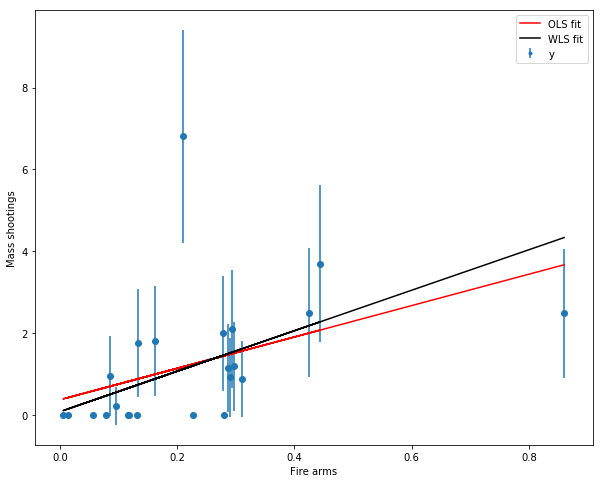

Number of mass shootings per person vs average total all civilian firearms per person, errors represent Poisson 
statistics.
statsmodels OLS and WSL.


In [32]:
fig = pl.figure(figsize=(10,8)) 
ax = fig.add_subplot(111)

ax.scatter(df_['firearmspp'], df_['shootingspp'], label = None)
ax.errorbar(df_['firearmspp'], df_['shootingspp'], yerr = np.sqrt(df_['shootingspp'] * 1.0), fmt = '.', label='y')
ax.plot(df_['firearmspp'], smO.predict(sm.add_constant(df_['firearmspp'])), label="OLS fit", color="red")
ax.plot(df_['firearmspp'], smW.predict(sm.add_constant(df_['firearmspp'])), label="WLS fit", color="black")
ax.set_xlabel("Fire arms")
ax.set_ylabel("Mass shootings")
ax.legend()
ax.set_ylim()
pl.show()
print("Number of mass shootings per person vs average total all civilian firearms per person, " + 
      "errors represent Poisson \nstatistics.\n" +
      "statsmodels OLS and WSL.")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


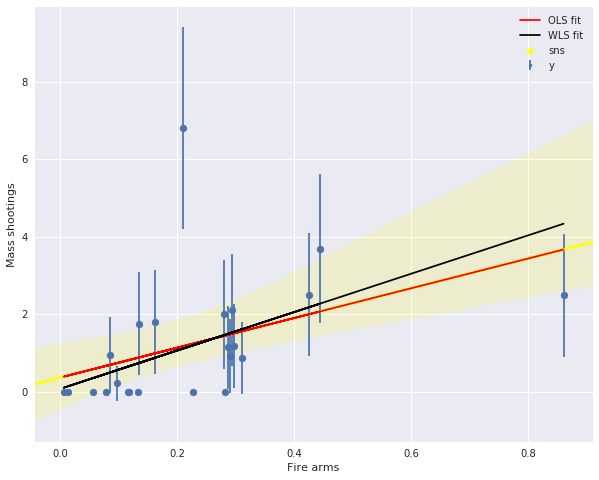

Number of mass shootings per person vs average total all civilian firearms per person, errors represent Poisson 
statistics.
statsmodels OLS and WSL as well as seabon.


In [33]:
import seaborn as sns

fig = pl.figure(figsize=(10,8)) 
ax = fig.add_subplot(111)

sns.regplot(y='shootingspp', x='firearmspp', data=df_, ax=ax, color="yellow", label="sns")
ax.scatter(df_['firearmspp'], df_['shootingspp'], label = None)
ax.errorbar(df_['firearmspp'], df_['shootingspp'], yerr = np.sqrt(df_['shootingspp'] * 1.0), fmt = '.', label='y')
ax.plot(df_['firearmspp'], smO.predict(sm.add_constant(df_['firearmspp'])), label="OLS fit", color="red")
ax.plot(df_['firearmspp'], smW.predict(sm.add_constant(df_['firearmspp'])), label="WLS fit", color="black")
ax.set_xlabel("Fire arms")
ax.set_ylabel("Mass shootings")
ax.legend()
ax.set_ylim()
pl.show()
print("Number of mass shootings per person vs average total all civilian firearms per person, " + 
      "errors represent Poisson \nstatistics.\n" +
      "statsmodels OLS and WSL as well as seabon.")

### Extra: numpy.polyfit()

In [34]:
coeff, intercept = np.polyfit(y=df_['shootingspp'], x=df_['firearmspp'], deg=1)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


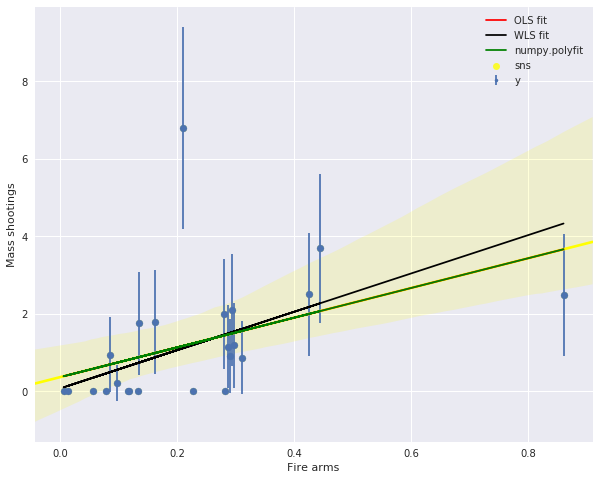

Number of mass shootings per person vs average total all civilian firearms per person, errors represent Poisson 
statistics.OLS, WSL, and numpy polyfit fits as well as seabon.


In [35]:
fig = pl.figure(figsize=(10,8)) 
ax = fig.add_subplot(111)

sns.regplot(y='shootingspp', x='firearmspp', data=df_, ax=ax, color="yellow", label="sns")
ax.scatter(df_['firearmspp'], df_['shootingspp'], label = None)
ax.errorbar(df_['firearmspp'], df_['shootingspp'], yerr = np.sqrt(df_['shootingspp'] * 1.0), fmt = '.', label='y')
ax.plot(df_['firearmspp'], smO.predict(sm.add_constant(df_['firearmspp'])), label="OLS fit", color="red")
ax.plot(df_['firearmspp'], smW.predict(sm.add_constant(df_['firearmspp'])), label="WLS fit", color="black")
ax.plot(df_['firearmspp'], coeff * df_['firearmspp'] + intercept, label="numpy.polyfit", color="green")
ax.set_xlabel("Fire arms")
ax.set_ylabel("Mass shootings")
ax.legend()
ax.set_ylim()
pl.show()
print("Number of mass shootings per person vs average total all civilian firearms per person, " + 
      "errors represent Poisson \nstatistics." +
      "OLS, WSL, and numpy polyfit fits as well as seabon.")

## Outlier removal:
The concept of outlier is actually rather sophisticated: a point can be an outlier in a context but not in another. If you want to remove outliers and try different fits, here is some info on how to remove data efficiently from a dataset 
    https://gist.github.com/fedhere/89db40a3c9a28335bf5a35d52a52c595

In [107]:
#Clearly, there are two outliers. One is the US, the other one is to the top of the plot.
df_outliers = df_.loc[[15,22],:] 
df_outliers

,Country Name,Average total all civilian firearms,Number of homicides by firearm,pop,gdp,Country,Guns/100 inhabitants,Number of mass shootings,gdp1,shootingspp,firearmspp,homicidepp
15,New Zealand,925000.0,7.0,4408100.0,1.761929e+11,New Zealand,22.6,3,39970.256245,6.805653,0.209841,0.000002
22,United States,270000000.0,9146.0,313993272.0,1.615526e+13,United States,88.8,78,51450.959115,2.484130,0.859891,0.000029


In [37]:
#Clearly, the other one is New Zealand.
df_removed = df_[~df_['Country Name'].isin(["United States", "New Zealand"])] 
## no countries is United States and New Zealand = countries without United States and New Zealand 
df_removed.head()

,Country Name,Average total all civilian firearms,Number of homicides by firearm,pop,gdp,Country,Guns/100 inhabitants,Number of mass shootings,gdp1,shootingspp,firearmspp,homicidepp
0,Australia,3050000.0,30.0,22742475.0,1.543411e+12,Australia,15.0,4,67864.689862,1.758824,0.134110,0.000001
1,Austria,2500000.0,18.0,8429991.0,4.094252e+11,Austria,30.4,1,48567.695286,1.186241,0.296560,0.000002
2,Belgium,1800000.0,70.0,11128246.0,4.978842e+11,Belgium,17.2,2,44740.583248,1.797228,0.161751,0.000006
3,Canada,9950000.0,173.0,34750545.0,1.824289e+12,Canada,30.8,4,52496.694870,1.151061,0.286326,0.000005
4,Denmark,650000.0,15.0,5591572.0,3.271489e+11,Denmark,12.0,0,58507.500210,0.000000,0.116246,0.000003


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


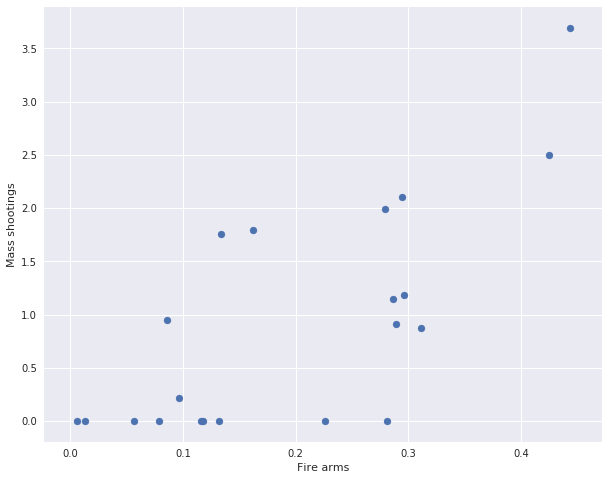

Number of mass shootings per person vs average total all civilian firearms per person, without outliers.


In [38]:
fig = pl.figure(figsize=(10,8)) 
ax = fig.add_subplot(111)

ax.scatter(df_removed['firearmspp'], df_removed['shootingspp'])
ax.set_xlabel("Fire arms")
ax.set_ylabel("Mass shootings")
ax.set_ylim()
pl.show()
print("Number of mass shootings per person vs average total all civilian firearms per person, without outliers.")

#### It still has an outlier on the top middle of the plot, which is New Zealand. Go Back to add New Zealand behind United States.


In [39]:
smO1 = sm.OLS(df_removed['shootingspp'], sm.add_constant(df_removed['firearmspp'])).fit()
smO1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     21.02
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           0.000202
Time:                        21:12:47   Log-Likelihood:                -22.679
No. Observations:                  21   AIC:                             49.36
Df Residuals:                      19   BIC:                             51.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.2731      0.306     -0.894      0.383        -0.913     0.367
firearmspp     6.0230      1.314      4.585      0.000         3.274     8.772
==============================================================================
Omnibus:                        0.185   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.911   Jarque-Bera (JB):                0.379
Skew:                           0.141   Prob(JB):                        0.828
Kurtosis:                       2.405   Cond. No.                         8.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
smW1= sm.WLS(df_removed['shootingspp'], sm.add_constant(df_removed['firearmspp']), weights=[1/(sqrt(xx) + 1e-10) 
            for xx in df_removed['firearmspp']]).fit()
smW1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.556
Model:                            WLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     23.76
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           0.000105
Time:                        21:12:47   Log-Likelihood:                -20.486
No. Observations:                  21   AIC:                             44.97
Df Residuals:                      19   BIC:                             47.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.1307      0.194     -0.674      0.509        -0.537     0.275
firearmspp     5.3794      1.104      4.874      0.000         3.070     7.689
==============================================================================
Omnibus:                        0.986   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.611   Jarque-Bera (JB):                0.901
Skew:                           0.308   Prob(JB):                        0.637
Kurtosis:                       2.195   Cond. No.                         8.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


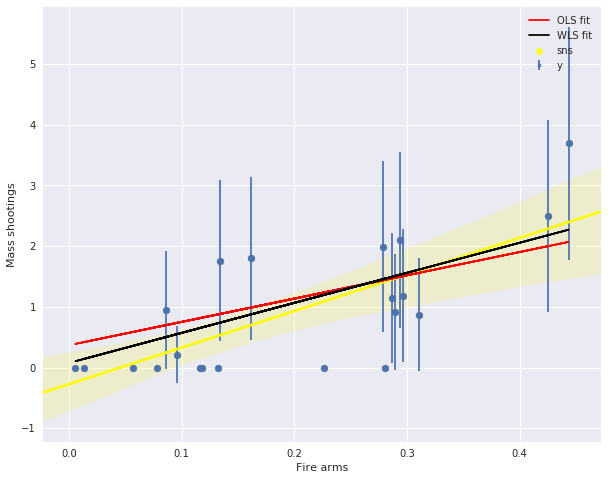

Number of mass shootings per person vs average total all civilian firearms per person,outliers are removed and errors represent Poisson statistics.
statsmodels OLS and WSL as well as seabon.


In [41]:
fig = pl.figure(figsize=(10,8)) 
ax = fig.add_subplot(111)

sns.regplot(y='shootingspp', x='firearmspp', data=df_removed, ax=ax, color="yellow", label="sns")
ax.scatter(df_removed['firearmspp'], df_removed['shootingspp'], label = None)
ax.errorbar(df_removed['firearmspp'], df_removed['shootingspp'], yerr = np.sqrt(df_removed['shootingspp'] * 1.0), fmt = '.', label='y')
ax.plot(df_removed['firearmspp'], smO.predict(sm.add_constant(df_removed['firearmspp'])), label="OLS fit", color="red")
ax.plot(df_removed['firearmspp'], smW.predict(sm.add_constant(df_removed['firearmspp'])), label="WLS fit", color="black")
ax.set_xlabel("Fire arms")
ax.set_ylabel("Mass shootings")
ax.legend()
ax.set_ylim()
pl.show()
print("Number of mass shootings per person vs average total all civilian firearms per person," + 
      "outliers are removed and errors represent Poisson statistics.\n" +
      "statsmodels OLS and WSL as well as seabon.")

In [42]:
coeff, intercept = np.polyfit(y=df_removed['shootingspp'], x=df_removed['firearmspp'], deg=1)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


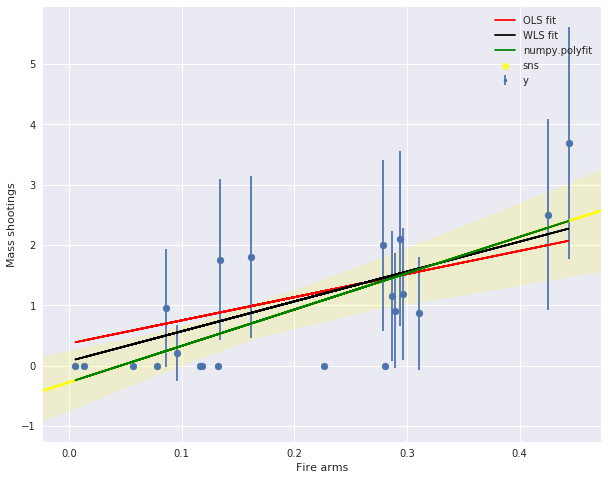

Number of mass shootings per person vs average total all civilian firearms per person, outliers are removed and errors represent Poisson statistics.OLS, WSL, and numpy polyfit fits as well as seabon.


In [43]:
fig = pl.figure(figsize=(10,8)) 
ax = fig.add_subplot(111)

sns.regplot(y='shootingspp', x='firearmspp', data=df_removed, ax=ax, color="yellow", label="sns")
ax.scatter(df_removed['firearmspp'], df_removed['shootingspp'], label = None)
ax.errorbar(df_removed['firearmspp'], df_removed['shootingspp'], yerr = np.sqrt(df_removed['shootingspp'] * 1.0), 
            fmt = '.', label='y')
ax.plot(df_removed['firearmspp'], smO.predict(sm.add_constant(df_removed['firearmspp'])), label="OLS fit",
        color="red")
ax.plot(df_removed['firearmspp'], smW.predict(sm.add_constant(df_removed['firearmspp'])), label="WLS fit", 
        color="black")
ax.plot(df_removed['firearmspp'], coeff * df_removed['firearmspp'] + intercept, label="numpy.polyfit", color="green")
ax.set_xlabel("Fire arms")
ax.set_ylabel("Mass shootings")
ax.legend()
ax.set_ylim()
pl.show()
print("Number of mass shootings per person vs average total all civilian firearms per person, " + 
      "outliers are removed and errors represent Poisson statistics." +
      "OLS, WSL, and numpy polyfit fits as well as seabon.")

#### After the removal of outliers, the fits looks better.

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


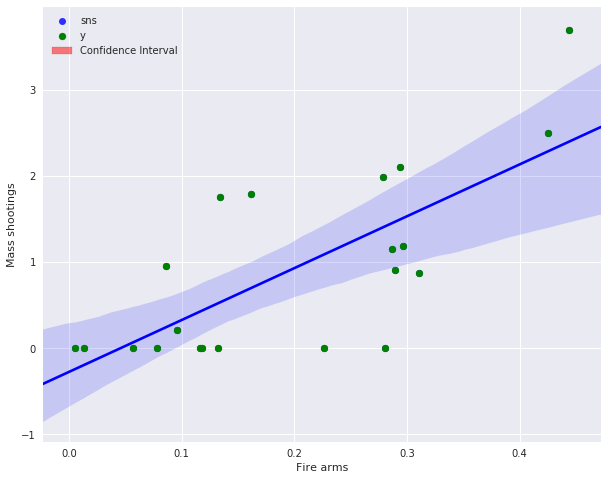

Number of mass shootings per person vs average total all civilian firearms per person without outliers.
Confidence interval is shown.


In [67]:
fig = pl.figure(figsize=(10,8)) 
ax = fig.add_subplot(111)

df_removed.sort_values("firearmspp", inplace=True)
sns.regplot(y='shootingspp', x='firearmspp', data=df_removed, ax=ax, color="blue", label="sns")
ax.scatter(df_removed['firearmspp'], df_removed['shootingspp'], label='y', color="green")

#residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))
n = df_removed['firearmspp']
y_observed = df_removed['shootingspp']
y_predict = coeff * n + intercept

sy = sqrt((y_observed  - y_predict) **2 / len(n)-2)

#confidence interval: y_predicted(x) +/- t_(n-2) sy sqrt( 1 + 1/n + (x - mean(x)^2) / sum((x* - mean(x)^2)

ci = sqrt(1 + 1/len(n) + (n - n.mean() ** 2) / (n - n.mean() ** 2).sum())

ax.fill_between(n, y_predict - sy * ci, y_predict + sy * ci, alpha=0.5, label="Confidence Interval", color="red")
ax.set_xlabel("Fire arms")
ax.set_ylabel("Mass shootings")
ax.legend()
ax.set_ylim()
pl.show()
print("Number of mass shootings per person vs average total all civilian firearms per person without outliers.\n" + 
      "Confidence interval is shown.")

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


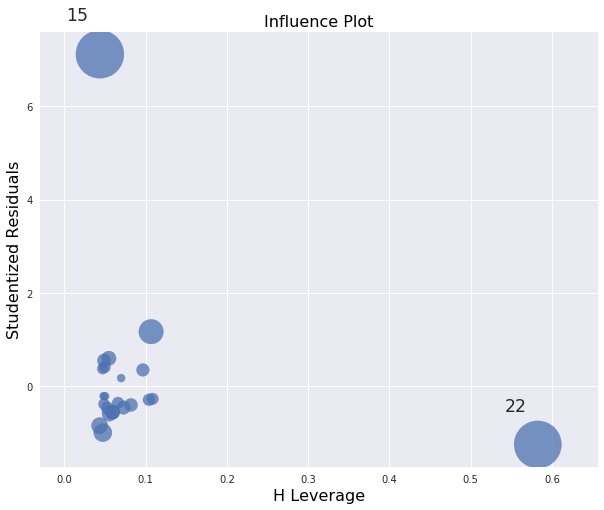

In [75]:
fig = pl.figure(figsize=(10,8)) 
ax = fig.add_subplot(111)

smO = sm.OLS(df_['shootingspp'], sm.add_constant(df_['firearmspp'])).fit()
sm.graphics.influence_plot(smO, alpha=0.05, criterion="cooks", ax=ax)
pl.show()

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


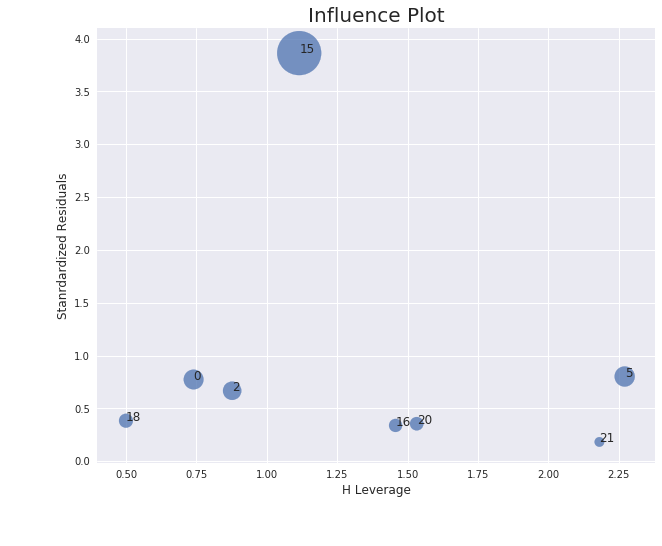

In [105]:
#got help from Junru Lu (lj1230)
fig = pl.figure(figsize=(10,8)) 
ax = fig.add_subplot(111)

smW = sm.WLS(df_['shootingspp'], sm.add_constant(df_['firearmspp']), 
               weights=[1/(sqrt(xx) + 1e-10) for xx in df_['firearmspp']]).fit()
ax.scatter(x=smW.fittedvalues, y=smW.resid_pearson, s=smW.resid_pearson * 500, alpha=0.75)
for i, txt in enumerate(df_.index):
    ax.annotate(txt, (smW.fittedvalues[i], smW.resid_pearson[i]))
ax.set_title("Influence Plot", fontsize=20)
ax.set_xlabel("H Leverage", fontsize=12)
ax.set_ylabel("Stanrdardized Residuals", fontsize=12)
ax.set_ylim()
pl.show()

## Discuss your findings

Unlike New Zealand, the United States is no longer the outlier.